In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from AVN import *
from scipy.stats import norm
import scipy.io as scp

In [2]:
###Define colors code for plots:
from matplotlib import cm

##Get colors : 
cmap_name1 = cm.get_cmap('tab20', 20)
cmap_name2 = cm.get_cmap('tab20b', 20)
cmap_name3 = cm.get_cmap('tab20c', 20)
cmap_name4 = cm.get_cmap('tab10', 10)
cmap_name5 = cm.get_cmap('Set3', 12)

cmap1 = cmap_name1(np.linspace(0, 1, 20))
cmap2 = cmap_name2(np.linspace(0, 1, 20))
cmap3 = cmap_name3(np.linspace(0, 1, 20))
cmap4 = cmap_name4(np.linspace(0, 1, 10))
cmap5 = cmap_name5(np.linspace(0, 1, 12))

cmap = np.vstack([cmap1, cmap2, cmap3, cmap4, cmap5])

print(len(cmap))

82


In [3]:
##Add migration swarms:
dfM = pd.read_csv("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas_23052024_2/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/dfM.csv")

##And without:
dfNM = pd.read_csv("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas_23052024_2/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/dfNM.csv")

dfM

,N,max_m,V2,plana,I,duration,v,swarms
0,180,1.7358,0.0403,0.0669,1,3.4026,0.099104,1
1,86,1.9626,0.0152,0.3706,2,2.0668,0.094615,2
2,69,0.7173,0.0093,0.4461,4,1.9180,0.027480,4
3,90,1.5348,0.0229,0.4009,5,4.0596,0.033489,5
4,166,1.5023,0.0244,0.3296,6,3.1943,0.072894,6
5,161,2.1737,0.0259,0.6164,8,3.6663,0.043437,8
6,110,1.1609,0.0156,0.1055,9,4.4534,0.030161,9
7,523,2.4513,0.1044,0.6143,10,1.4172,0.020049,10
8,102,2.3205,0.0083,0.4228,11,0.5002,0.088799,11
9,251,2.0582,0.0538,0.4356,12,3.1772,0.017347,12


In [4]:
path_to_df0 = "/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas_23052024_2/new_all_run_files_for_etas/catalog_all/"

####Raw data:
df0 = pd.read_csv(path_to_df0+'raw_data_modified_version.csv')
###Structure : t, x, y, z, m, x_km, y_km

###Swarms obtained by after ETAS & seismicity rate & checking step:
df_swarms = pd.read_csv('v0_d03_n50_every1_clusters/new_df_final_swarms_of_v0_d03_n50_every1.csv')

##Rename swarms after sorting along t1:
df_swarms = df_swarms.sort_values("t1")
df_swarms.index = np.arange(1, len(df_swarms)+1)

df_swarms

,t1,t2,x1,x2,y1,y2,z1,z2,num_EQ
1,13.534078,16.936724,42.763,42.771,13.153,13.163,5.301,6.640,31
2,21.189318,23.352065,42.512,42.518,13.414,13.421,9.786,10.828,30
3,31.959698,34.152999,42.905,42.914,13.173,13.183,4.573,5.337,52
4,33.400373,35.318887,42.766,42.773,13.219,13.227,6.343,7.093,97
5,43.213940,47.283527,42.896,42.905,13.219,13.228,2.722,3.792,50
6,54.623879,57.830113,42.632,42.653,13.287,13.310,6.468,7.906,27
7,56.921319,57.148958,42.863,42.881,13.066,13.090,1.165,3.237,114
8,72.571283,76.237535,42.523,42.529,13.451,13.464,9.863,11.278,124
9,82.026167,86.479576,42.763,42.770,13.101,13.110,4.584,5.328,162
10,89.020661,90.444182,42.458,42.473,13.239,13.256,6.073,7.706,175


In [5]:
###Clusters from dbscan:
v0_n50_d0_3 = scp.loadmat("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas_23052024_2/new_all_run_files_for_etas/dbscan_data/v0_d03km_n50_every1.mat")["clusters"].reshape(-1) ##au moins 50 séismes à < 300 m, v = 0km/d : 1 séisme sur 1 comme vertex

###Add columns:
df0["dbscan"] = v0_n50_d0_3

df0.head()

,t,x,y,z,m,x_km,y_km,dbscan
0,0.004465,42.99118,12.92042,4.107,0.547416,4780.401106,1050.875824,2.0
1,0.024991,42.30519,13.68531,6.154,0.964305,4704.122499,1125.431260,-0.0
2,0.028414,43.52994,12.65680,14.826,0.025395,4840.308485,1020.365169,-0.0
3,0.030136,43.16713,12.99694,8.917,-0.127835,4799.965854,1054.068313,-0.0
4,0.043938,43.31555,12.55297,3.274,-0.889339,4816.469405,1015.584715,-0.0


In [6]:
###Create a column of swarms number:
df0["swarms_num"] = np.zeros(len(df0)) -1


for i in range(0, len(df_swarms)):
    select_swarms = df0.index[(df0.t >= df_swarms.t1.iloc[i])&(df0.t <= df_swarms.t2.iloc[i])
                       & (df0.x >= df_swarms.x1.iloc[i])&(df0.x <= df_swarms.x2.iloc[i])
                       & (df0.y >= df_swarms.y1.iloc[i])&(df0.y <= df_swarms.y2.iloc[i])
                       & (df0.z >= df_swarms.z1.iloc[i])&(df0.z <= df_swarms.z2.iloc[i])]
    
    df0.swarms_num.iloc[select_swarms] = df_swarms.index[i]   
    
    
df0['swarms_num'] = df0['swarms_num'].astype(int)

print(np.unique(df0["swarms_num"].values)[1:])

###Remove all rows with a magnitude equal to a nan value:
df0 = df0.dropna()

df0.index = np.arange(0, len(df0))

df0

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


,t,x,y,z,m,x_km,y_km,dbscan,swarms_num
0,0.004465,42.99118,12.92042,4.107,0.547416,4780.401106,1050.875824,2.0,-1
1,0.024991,42.30519,13.68531,6.154,0.964305,4704.122499,1125.431260,-0.0,-1
2,0.028414,43.52994,12.65680,14.826,0.025395,4840.308485,1020.365169,-0.0,-1
3,0.030136,43.16713,12.99694,8.917,-0.127835,4799.965854,1054.068313,-0.0,-1
4,0.043938,43.31555,12.55297,3.274,-0.889339,4816.469405,1015.584715,-0.0,-1
...,...,...,...,...,...,...,...,...,...
894438,365.996726,42.81393,13.10829,7.216,-0.325824,4760.691806,1069.225754,233.0,-1
894439,365.997166,42.80558,13.14988,3.126,0.304970,4759.763328,1072.763006,-0.0,-1
894440,365.997419,43.00835,13.14668,1.336,-0.183670,4782.310323,1068.979802,225.0,-1
894441,365.999614,42.66073,13.21744,4.262,-0.273458,4743.656743,1080.795874,-0.0,-1


In [7]:
from AVN import *

###Define AVN MS:
A, V, N, df_AVN = AVN(df0)

df_AVN

,t,x,y,z,m,x_km,y_km,dbscan,swarms_num
621,9.067054,42.71446,13.24279,3.276,6.046692,4749.631246,1081.932511,-0.0,-1.0
184899,72.804244,42.91094,13.13936,2.605,5.576763,4771.478826,1070.077358,-0.0,-1.0
201811,76.277989,42.83603,13.12131,6.104,6.074127,4763.149214,1069.905228,233.0,-1.0


In [8]:
###Rescale on Norcia event:
xN_km = df0.x_km - N.x_km
yN_km = df0.y_km - N.y_km

df0["xN_km"] = xN_km
df0["yN_km"] = yN_km

###Redefine AVN MS:
A, V, N, df_AVN = AVN(df0)

df0_m5 = df0[df0.m >= 5]

df0

,t,x,y,z,m,x_km,y_km,dbscan,swarms_num,xN_km,yN_km
0,0.004465,42.99118,12.92042,4.107,0.547416,4780.401106,1050.875824,2.0,-1,17.251893,-19.029404
1,0.024991,42.30519,13.68531,6.154,0.964305,4704.122499,1125.431260,-0.0,-1,-59.026715,55.526032
2,0.028414,43.52994,12.65680,14.826,0.025395,4840.308485,1020.365169,-0.0,-1,77.159272,-49.540059
3,0.030136,43.16713,12.99694,8.917,-0.127835,4799.965854,1054.068313,-0.0,-1,36.816640,-15.836915
4,0.043938,43.31555,12.55297,3.274,-0.889339,4816.469405,1015.584715,-0.0,-1,53.320191,-54.320513
...,...,...,...,...,...,...,...,...,...,...,...
894438,365.996726,42.81393,13.10829,7.216,-0.325824,4760.691806,1069.225754,233.0,-1,-2.457408,-0.679474
894439,365.997166,42.80558,13.14988,3.126,0.304970,4759.763328,1072.763006,-0.0,-1,-3.385886,2.857778
894440,365.997419,43.00835,13.14668,1.336,-0.183670,4782.310323,1068.979802,225.0,-1,19.161110,-0.925426
894441,365.999614,42.66073,13.21744,4.262,-0.273458,4743.656743,1080.795874,-0.0,-1,-19.492471,10.890646


In [13]:
#####Separation swarms North/South :

###Swarms located in North:
IN = df0[(df0.yN_km >= -50)&(df0.yN_km <= 15)
        & (df0.xN_km >= -15)&(df0.xN_km <= 50)]
###Swarms located in South:
IS = df0[(df0.yN_km >= 10)&(df0.yN_km <= 40)
        & (df0.xN_km >= -50)&(df0.xN_km <= -10)]

print("IN:", len(np.unique(IN.swarms_num)[1:]))
print("IS:", len(np.unique(IS.swarms_num)[1:]))

IN: 20
IS: 20


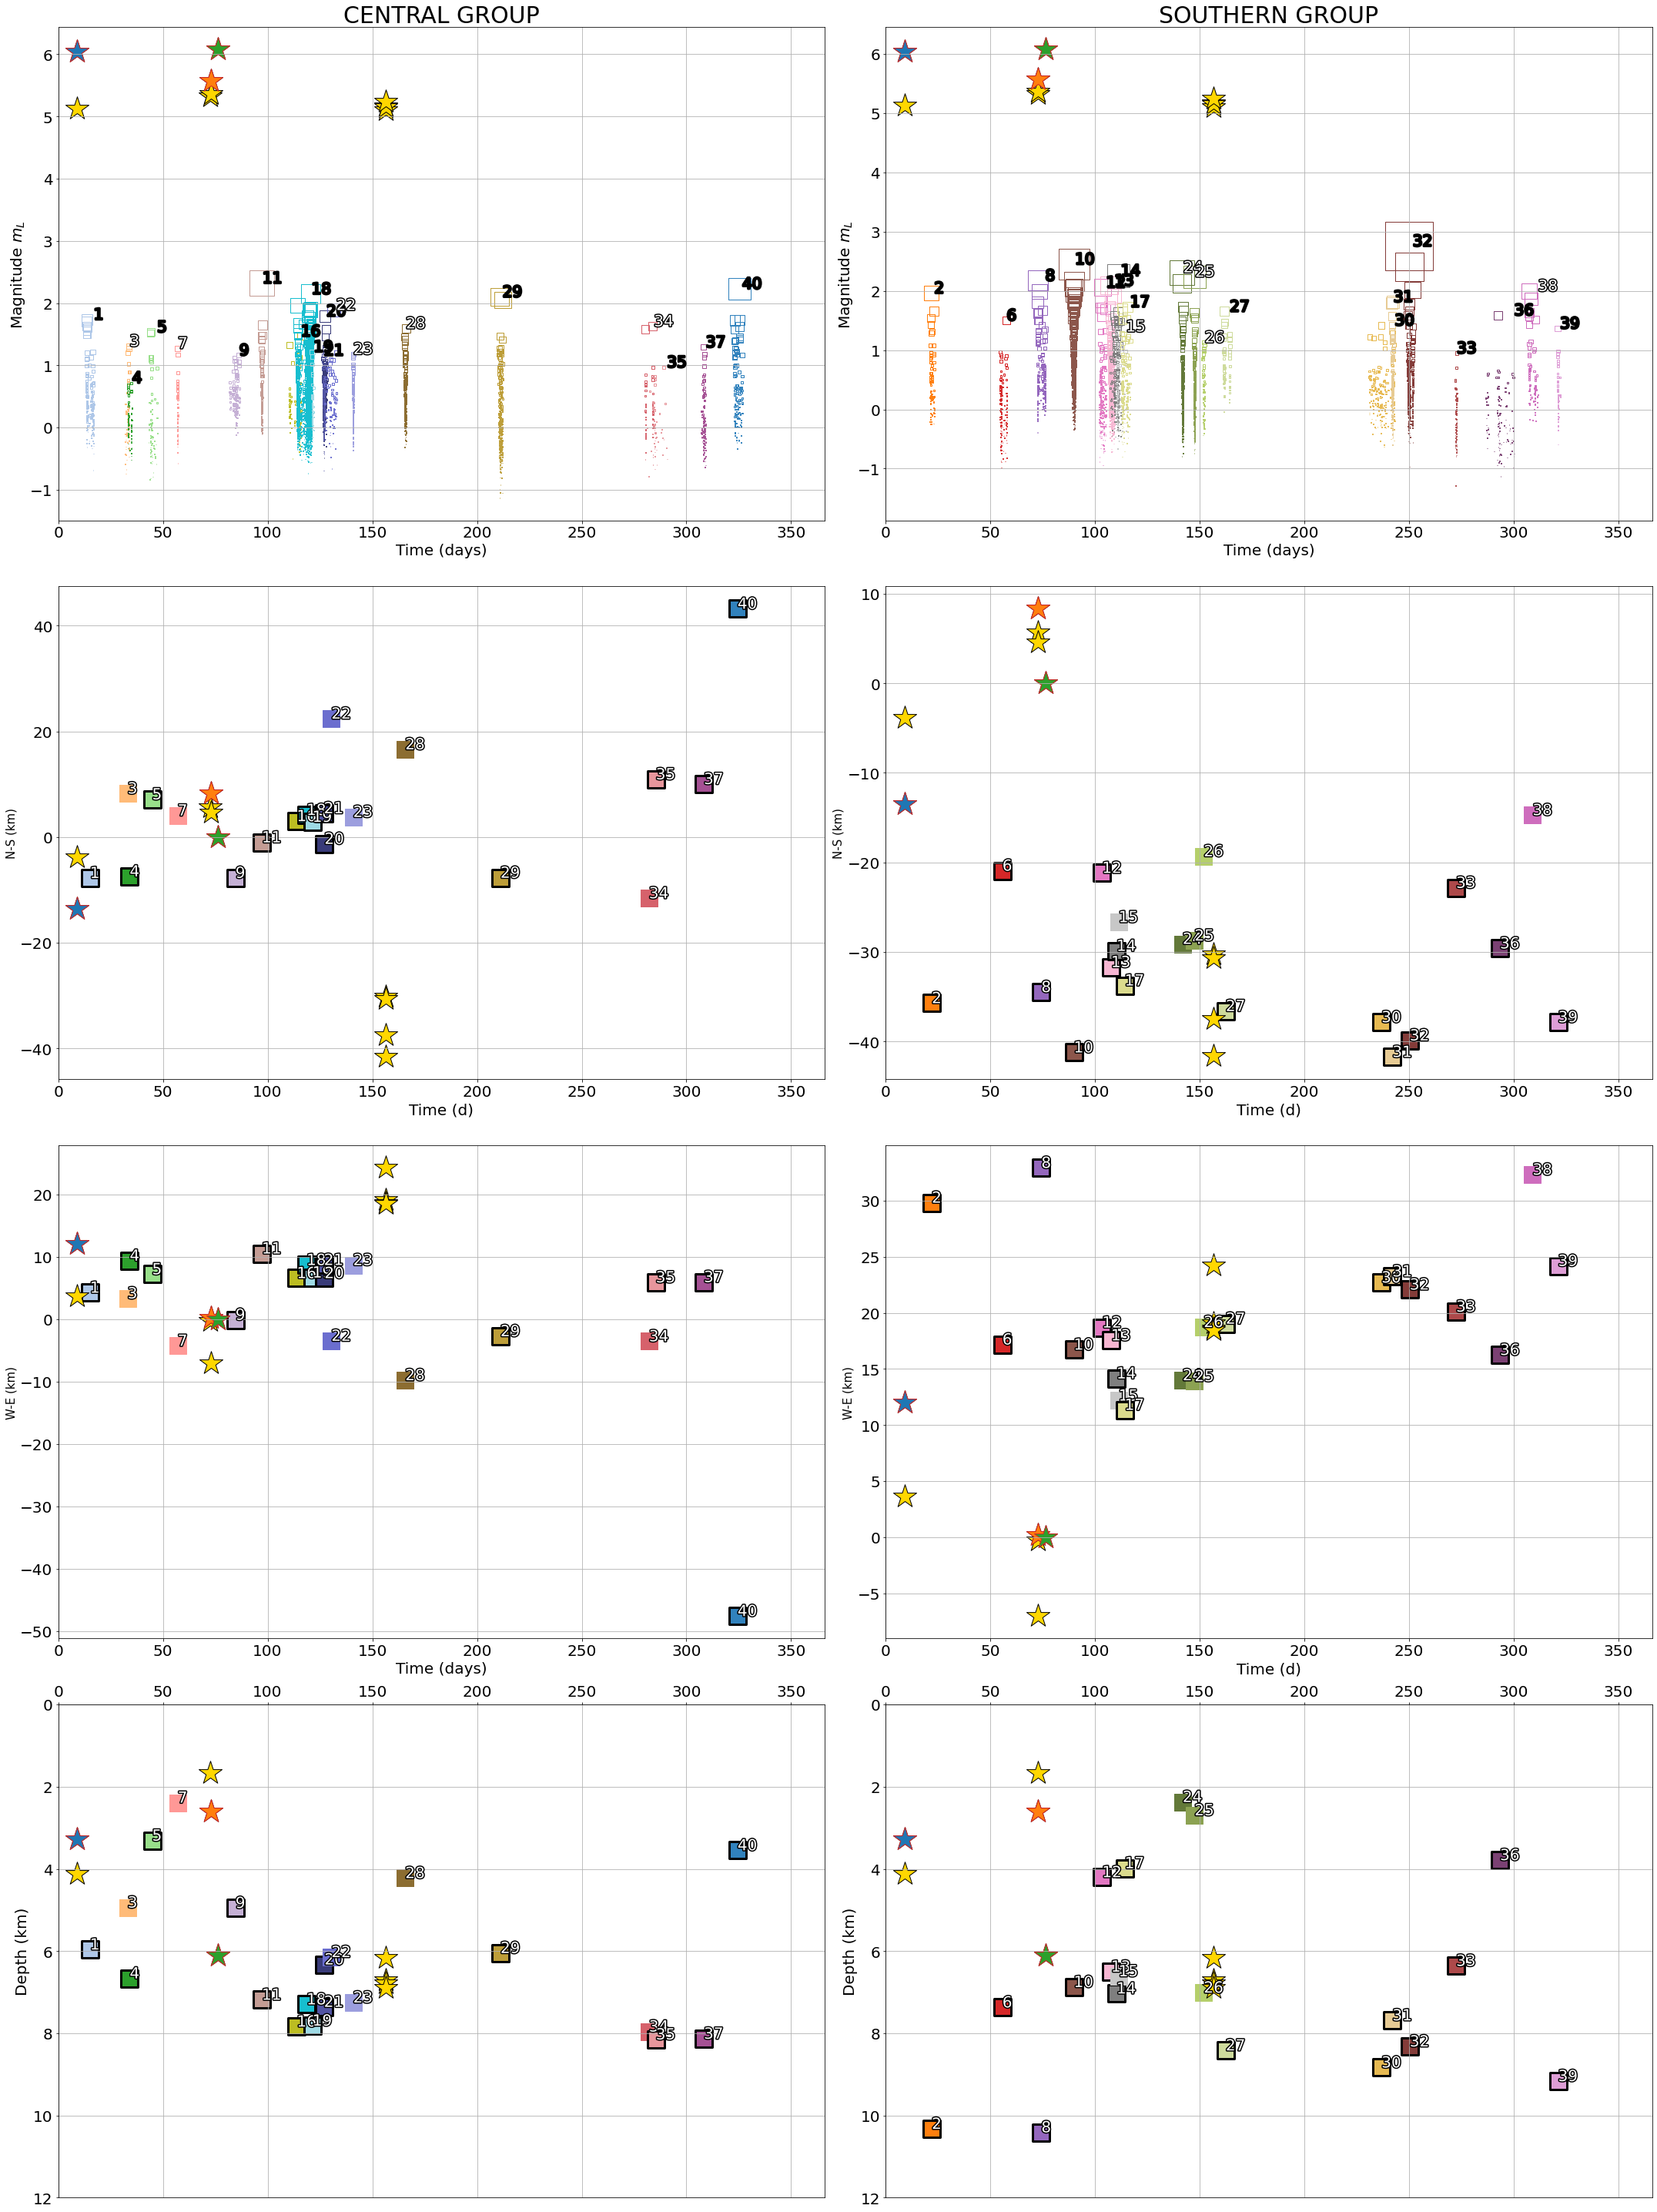

In [23]:
msz = 500
msz_stars = 1000

plt.figure(figsize=(30,40))
plt.subplot(4,2,1)
##swarms clusters:
list_swarms = np.unique(IN.swarms_num)[1:]
for i in list_swarms:
    if dfM[dfM.I.values == i].empty == False:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t, I.m, s=np.exp(3*I.m), marker='s', facecolors="none", edgecolors=cmap[int(i)], linewidths=1)
        plt.annotate(str(int(i)), (I.t.max(), I.m.max()),
                color="k", alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    else:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t, I.m, s=np.exp(3*I.m), marker='s', facecolors="none", edgecolors=cmap[int(i)], linewidths=1)
        plt.annotate(str(int(i)), (I.t.max(), I.m.max()),
                color="white", alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    
plt.scatter(df0_m5.t, df0_m5.m, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)
plt.scatter(A.t, A.m, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
plt.scatter(V.t, V.m, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
plt.scatter(N.t, N.m, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)
plt.xlim([0,366])
plt.xlabel("Time (days)", fontsize=20)
plt.ylabel("Magnitude $m_L$", fontsize=20)
plt.title("CENTRAL GROUP", fontsize=30)
plt.tick_params(labelsize=20)
plt.grid(True)

plt.subplot(4,2,3)
##swarms clusters:
for i in list_swarms:
    if dfM[dfM.I.values == i].empty == False:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t.mean(), I.xN_km.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors='k', linewidths=3)
        plt.annotate(str(int(i)), (I.t.mean(), I.xN_km.mean()),
                color='white', alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    else:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t.mean(), I.xN_km.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors=cmap[int(i)], linewidths=1)
        plt.annotate(str(int(i)), (I.t.mean(), I.xN_km.mean()),
                color='white', alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    
plt.scatter(df0_m5.t, df0_m5.xN_km, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)
plt.scatter(A.t, A.xN_km, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
plt.scatter(V.t, V.xN_km, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
plt.scatter(N.t, N.xN_km, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)
plt.xlim([0,366])
plt.ylabel("N-S (km)", fontsize=15)
plt.xlabel("Time (d)", fontsize=20)
plt.tick_params(labelsize=20)
plt.grid(True)

plt.subplot(4,2,5)
##swarms clusters:
for i in list_swarms:
    if dfM[dfM.I.values == i].empty == False:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t.mean(), I.yN_km.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors='k', linewidths=3)
        plt.annotate(str(int(i)), (I.t.mean(), I.yN_km.mean()),
                color="white", alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    else:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t.mean(), I.yN_km.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors=cmap[int(i)], linewidths=1)
        plt.annotate(str(int(i)), (I.t.mean(), I.yN_km.mean()),
                color="white", alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])

plt.scatter(df0_m5.t, df0_m5.yN_km, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)
plt.scatter(A.t, A.yN_km, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
plt.scatter(V.t, V.yN_km, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
plt.scatter(N.t, N.yN_km, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)
plt.xlim([0,366])
plt.xlabel("Time (days)", fontsize=20)
plt.ylabel("W-E (km)", fontsize=15)
plt.tick_params(labelsize=20)
plt.grid(True)

plt.subplot(4,2,7)
##swarms clusters:
for i in list_swarms:
    if dfM[dfM.I.values == i].empty == False:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t.mean(), I.z.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors='k', linewidths=3)
        plt.annotate(str(int(i)), (I.t.mean(), I.z.mean()),
                color="white", alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    else:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t.mean(), I.z.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors=cmap[int(i)], linewidths=1)
        plt.annotate(str(int(i)), (I.t.mean(), I.z.mean()),
                color="white", alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    
plt.scatter(df0_m5.t, df0_m5.z, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)
plt.scatter(A.t, A.z, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
plt.scatter(V.t, V.z, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
plt.scatter(N.t, N.z, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)

##Put the origin point to the top left corner:
ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
ax.xaxis.tick_top()                     # and move the X-Axis      
ax.yaxis.tick_left()                    # remove right y-Ticks

plt.xlim([0,366])
plt.ylim([12,0])
plt.ylabel("Depth (km)", fontsize=20)
plt.tick_params(labelsize=20)
plt.grid(True)

###########################################################################################################
###########################################################################################################
###########################################################################################################

plt.subplot(4,2,2)
##swarms clusters:
list_swarms = np.unique(IS.swarms_num)[1:]
for i in list_swarms:
    if dfM[dfM.I.values == i].empty == False:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t, I.m, s=np.exp(3*I.m), marker='s', facecolors="none", edgecolors=cmap[int(i)], linewidths=1)
        plt.annotate(str(int(i)), (I.t.max(), I.m.max()),
                color="k", alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    else:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t, I.m, s=np.exp(3*I.m), marker='s', facecolors="none", edgecolors=cmap[int(i)], linewidths=1)
        plt.annotate(str(int(i)), (I.t.max(), I.m.max()),
                color="white", alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    
plt.scatter(df0_m5.t, df0_m5.m, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)
plt.scatter(A.t, A.m, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
plt.scatter(V.t, V.m, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
plt.scatter(N.t, N.m, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)
plt.xlim([0,366])
plt.xlabel("Time (days)", fontsize=20)
plt.ylabel("Magnitude $m_L$", fontsize=20)
plt.title("SOUTHERN GROUP", fontsize=30)
plt.tick_params(labelsize=20)
plt.grid(True)

plt.subplot(4,2,4)
##swarms clusters:
for i in list_swarms:
    if dfM[dfM.I.values == i].empty == False:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t.mean(), I.xN_km.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors='k', linewidths=3)
        plt.annotate(str(int(i)), (I.t.mean(), I.xN_km.mean()),
                color='white', alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    else:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t.mean(), I.xN_km.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors=cmap[int(i)], linewidths=1)
        plt.annotate(str(int(i)), (I.t.mean(), I.xN_km.mean()),
                color='white', alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])

plt.scatter(df0_m5.t, df0_m5.xN_km, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)
plt.scatter(A.t, A.xN_km, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
plt.scatter(V.t, V.xN_km, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
plt.scatter(N.t, N.xN_km, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)
plt.xlim([0,366])
plt.xlabel("Time (d)", fontsize=20)
plt.ylabel("N-S (km)", fontsize=15)
plt.tick_params(labelsize=20)
plt.grid(True)

plt.subplot(4,2,6)
##swarms clusters:
for i in list_swarms:
    if dfM[dfM.I.values == i].empty == False:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t.mean(), I.yN_km.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors='k', linewidths=3)
        plt.annotate(str(int(i)), (I.t.mean(), I.yN_km.mean()),
                color="white", alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    else:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t.mean(), I.yN_km.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors=cmap[int(i)], linewidths=1)
        plt.annotate(str(int(i)), (I.t.mean(), I.yN_km.mean()),
                color="white", alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])

plt.scatter(df0_m5.t, df0_m5.yN_km, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)
plt.scatter(A.t, A.yN_km, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
plt.scatter(V.t, V.yN_km, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
plt.scatter(N.t, N.yN_km, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)
plt.xlim([0,366])
plt.xlabel("Time (d)", fontsize=20)
plt.ylabel("W-E (km)", fontsize=15)
plt.tick_params(labelsize=20)
plt.grid(True)

plt.subplot(4,2,8)
##swarms clusters:
for i in list_swarms:
    if dfM[dfM.I.values == i].empty == False:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t.mean(), I.z.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors='k', linewidths=3)
        plt.annotate(str(int(i)), (I.t.mean(), I.z.mean()),
                color="white", alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    else:
        I = df0[df0.swarms_num == i]
        plt.scatter(I.t.mean(), I.z.mean(), s=msz, marker='s', facecolors=cmap[int(i)], edgecolors=cmap[int(i)], linewidths=1)
        plt.annotate(str(int(i)), (I.t.mean(), I.z.mean()),
                color="white", alpha =1, size=20, 
                path_effects=[pe.withStroke(linewidth=3, foreground="k")])
    
plt.scatter(df0_m5.t, df0_m5.z, s=msz_stars, marker='*', c='gold', edgecolors='k', linewidths=1)
plt.scatter(A.t, A.z, s=msz_stars, marker='*', c='tab:blue', edgecolors='tab:red', linewidths=1)
plt.scatter(V.t, V.z, s=msz_stars, marker='*', c='tab:orange', edgecolors='tab:red', linewidths=1)
plt.scatter(N.t, N.z, s=msz_stars, marker='*', c='tab:green', edgecolors='tab:red', linewidths=1)

##Put the origin point to the top left corner:
ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
ax.xaxis.tick_top()                     # and move the X-Axis      
ax.yaxis.tick_left()                    # remove right y-Ticks

plt.xlim([0,366])
plt.ylim([12,0])
plt.ylabel("Depth (km)", fontsize=20)
plt.tick_params(labelsize=20)
plt.grid(True)


plt.tight_layout()
plt.savefig("v0_d03_n50_every1_clusters/m_xyzvst_for_IN_IS_swarms.png")
plt.show()